Import Libraries

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math

***Part B. Pre-Processing and Exploratory data analysis***

In [16]:
df_2c = pd.read_csv('column_2c.dat', sep='\s+', header=None)
df_2c.head(5)

,0,1,2,3,4,5,6
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB


In [17]:
df_2c.columns = ['PI', 'PT', 'LLA', 'SS', 'PR', 'GOS', 'Label']

In [18]:
df_2c.head(5)

,PI,PT,LLA,SS,PR,GOS,Label
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB


In [19]:
df_3c = pd.read_csv('column_3c.dat', sep='\s+', header=None)
df_3c.columns = ['PI', 'PT', 'LLA', 'SS', 'PR', 'GOS', 'Label']
df_3c.head(5)

,PI,PT,LLA,SS,PR,GOS,Label
0,63.03,22.55,39.61,40.48,98.67,-0.25,DH
1,39.06,10.06,25.02,29.00,114.41,4.56,DH
2,68.83,22.22,50.09,46.61,105.99,-3.53,DH
3,69.30,24.65,44.31,44.64,101.87,11.21,DH
4,49.71,9.65,28.32,40.06,108.17,7.92,DH


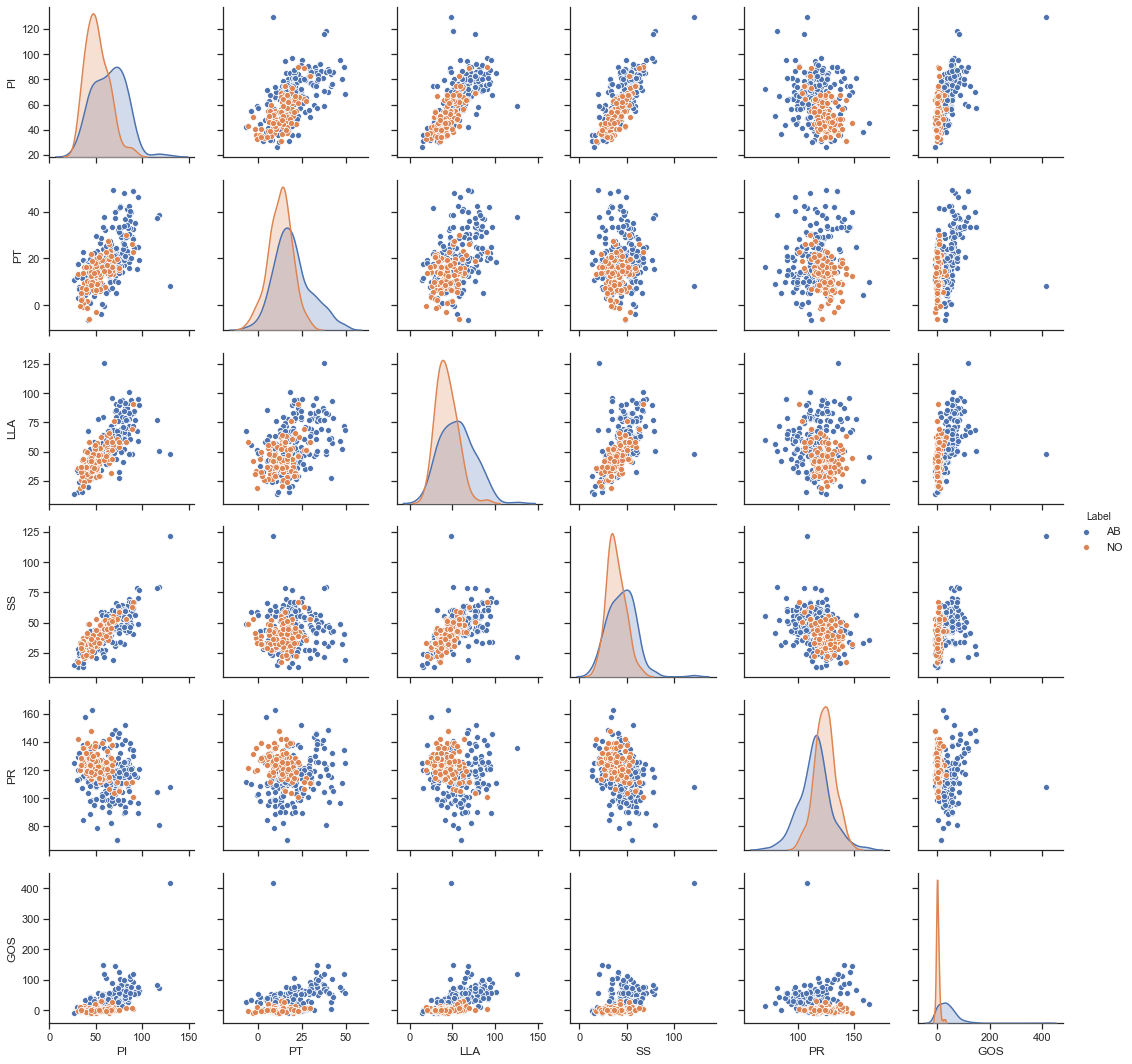

In [20]:
sns.set(style="ticks", color_codes=True)
pair_scat = sns.pairplot(df_2c, hue='Label')

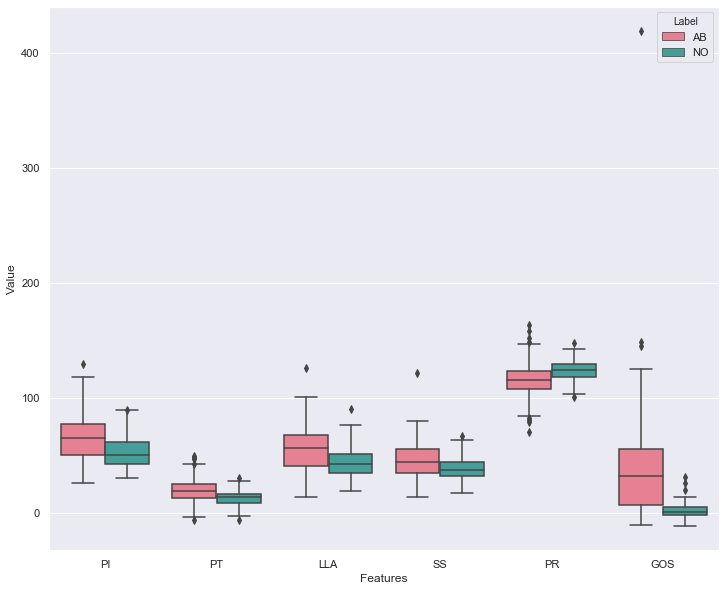

In [23]:
#cited from https://stackoverflow.com/questions/25284859/grouping-boxplots-in-seaborn-when-input-is-a-dataframe
df_2c_melt = pd.melt(df_2c, "Label", var_name="Features", value_name="Value")
sns.boxplot(x="Features", hue="Label", y="Value", data=df_2c_melt, palette="husl")
sns.set(rc={'figure.figsize':(12,10)})

In [24]:
# NO = 0, AB = 1
# use 
c0 = df_2c.iloc[210:280]
c1 = df_2c.iloc[0:140]

In [25]:
#count number of rows
print(len(c0),len(c1))

70 140


In [26]:
train_2c = pd.concat([c1,c0])

In [27]:
#total 310 entries so index ranges from [0,309]
temp1 = df_2c.iloc[280:]
temp2 = df_2c.iloc[140:210]
test_2c = pd.concat([temp2, temp1])

***Part C. Classification using KNN***

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
#create variables for training and test set
x_train = train_2c.iloc[:,0:6]
y_train = train_2c.iloc[:,6]
x_test = test_2c.iloc[:,0:6]
y_test = test_2c.iloc[:,6]

In [30]:
#edit y_test since the index is not chronological
y_test = pd.DataFrame(data=y_test)
y_test2 = []
for index, row in y_test.iterrows():
    y_test2.append(row[0])
y_test = y_test2

In [31]:
#edit y_train
y_train = list(y_train)

***KNN over K***

In [32]:
xrange = []
errorlist = []
errortrain = []
size = len(y_test)
for i in range(1,209):
    xrange.append(i)
    
    #KNN and errors for test set
    classifier = KNeighborsClassifier(n_neighbors=i,p=2)
    classifier.fit(x_train, y_train)
    y_predict = classifier.predict(x_test)
    error = 0
    for i in range(0,size):
        if y_test[i] != y_predict[i]:
            error = error+1
    errorlist.append(error/70)
    
    #KNN and errors for training set
    classifier.fit(x_train, y_train)
    y_predict2 = classifier.predict(x_train)
    error = 0
    for i in range(0,size):
        if y_train[i] != y_predict2[i]:
            error = error+1
    errortrain.append(error/70)

***Calculations and Errors for Test Set***
I decide k=3 as k* (the most suitable number of neighbors)

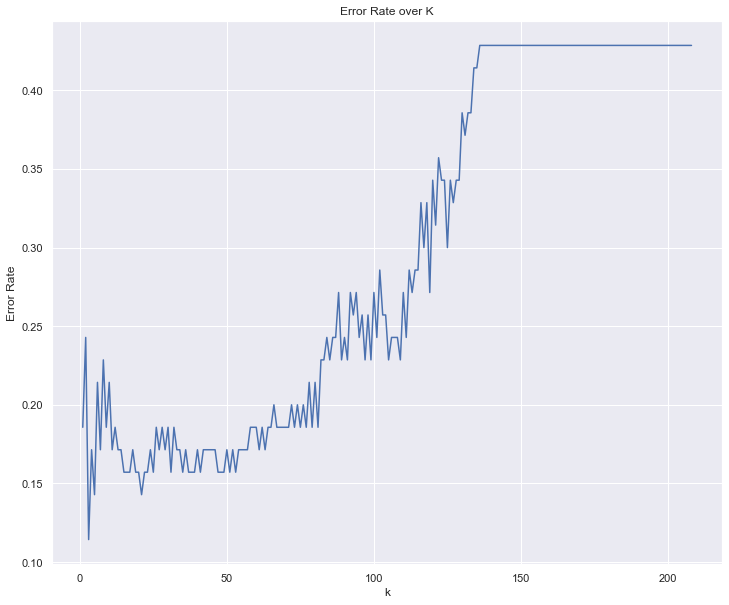

In [33]:
plt.plot(xrange,errorlist)
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.title('Error Rate over K')
plt.show()

In [34]:
lowest_k = np.argmin(errorlist)+1
print("K for lowest error is", lowest_k)

K for lowest error is 3


In [35]:
lowest_error = min(errorlist)
print("Lowest error rate is", lowest_error)

Lowest error rate is 0.11428571428571428


Determining true positive (positive and is classified correctly as positive) and
true negative (negative and is classified correctly as negative).
We assume that NO=0 as negative and AB=1 as positive.

In [36]:
classifier = KNeighborsClassifier(n_neighbors=3, p=2)

In [37]:
classifier.fit(x_train, y_train)
y_predict = classifier.predict(x_test)

In [38]:
size = len(y_test)
true_pos = 0
true_neg = 0
true_error = []
pred_error = []
for i in range(0,size):
    if y_test[i] == y_predict[i]:
        if y_test[i] == 'AB':
            true_pos = true_pos+1
        elif y_test[i] == 'NO':
            true_neg = true_neg+1
    else:
        true_error.append(y_test[i])
        pred_error.append(y_predict[i])
tot_correct = true_pos+true_neg
print(tot_correct)

92


In [39]:
pos_rate = true_pos/tot_correct
print("The true positive rate is", pos_rate)

The true positive rate is 0.75


In [40]:
neg_rate = true_neg/tot_correct
print("The true negative rate is", neg_rate)

The true negative rate is 0.25


Confusion matrix and precision

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
#confusion matrix shows 69 true positives, 23 true negatives, 
con_matrix = confusion_matrix(y_test, y_predict)
con_matrix = pd.DataFrame(con_matrix, columns = ['AB','NO'], index = ['AB','NO'])
con_matrix

,AB,NO
AB,69,1
NO,7,23


In [43]:
true_error

['AB', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO']

In [44]:
pred_error

['NO', 'AB', 'AB', 'AB', 'AB', 'AB', 'AB', 'AB']

The list above proves that the true values are the rows and the predicted values are the columns. This means that there are 69 predicted AB when actually AB and 7 that is predicted AB when actually it is NO.
We know that precision rate = TP/(TP + FP).

In [45]:
prec_rate = 69/(69+7)
print("The precision rate is", prec_rate)

The precision rate is 0.9078947368421053


In [46]:
#Recall rate = TP/(TP+FN).
#F = 2/(1/Recall + 1/Precision)
rec_rate = 69/(69+1)
F = 2/(1/prec_rate+1/rec_rate)
print("The F-score is", F)

The F-score is 0.9452054794520549


In [47]:
from sklearn.metrics import classification_report

In [48]:
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

          AB       0.91      0.99      0.95        70
          NO       0.96      0.77      0.85        30

    accuracy                           0.92       100
   macro avg       0.93      0.88      0.90       100
weighted avg       0.92      0.92      0.92       100



***Calculations and Errors for Training Set***

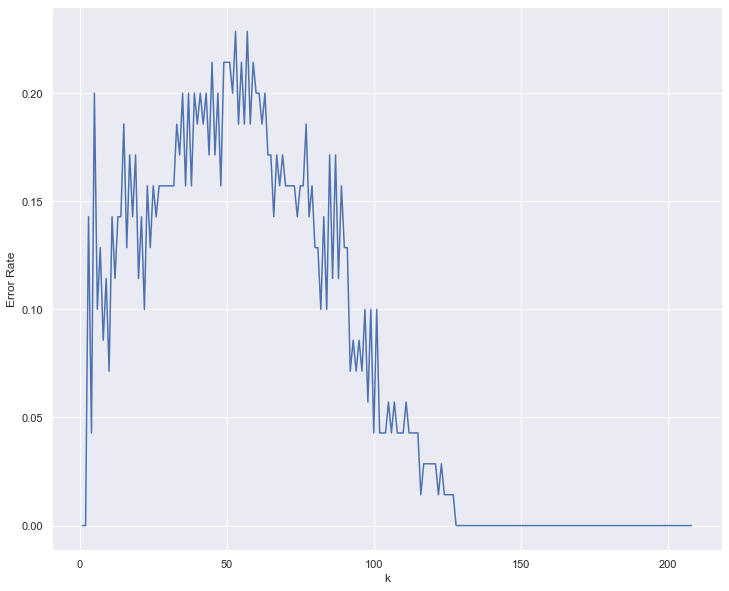

In [49]:
plt.plot(xrange, errortrain)
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.show()

In [50]:
min_k_train = np.argmin(errortrain)+1
print(min_k_train)

1


In [51]:
classifier = KNeighborsClassifier(n_neighbors=min_k_train,p=2)
classifier.fit(x_train, y_train)
y_predict = classifier.predict(x_train)
y_predict = list(y_predict)

In [52]:
#confusion matrix
con_matrix = confusion_matrix(y_train, y_predict)
con_matrix = pd.DataFrame(con_matrix, columns = ['AB','NO'], index = ['AB','NO'])
con_matrix

,AB,NO
AB,140,0
NO,0,70


In [53]:
#true positive rate and true negative rate
tpr = 140/(140+70)
tnr = 70/(140+70)
print("The true positive rate is", tpr)
print("The true negative rate is", tnr)

The true positive rate is 0.6666666666666666
The true negative rate is 0.3333333333333333


In [54]:
report = classification_report(y_train, y_predict2)
print(report)

              precision    recall  f1-score   support

          AB       0.67      1.00      0.80       140
          NO       0.00      0.00      0.00        70

    accuracy                           0.67       210
   macro avg       0.33      0.50      0.40       210
weighted avg       0.44      0.67      0.53       210



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Splitting the dataset based on ***part iii***

In [55]:
#set up test set
x_test = test_2c.iloc[:,0:6]
y_test = test_2c.iloc[:,6]

In [56]:
#convert form of y_test
y_test = pd.DataFrame(data=y_test)
y_test2 = []
for index, row in y_test.iterrows():
    y_test2.append(row[0])
y_test = y_test2

In [57]:
#split the dataset into no and ab only
no = train_2c.loc[train_2c['Label'] == 'NO']
ab = train_2c.loc[train_2c['Label'] == 'AB']

In [58]:
mink_list = []
for n in range(10,211,10):
    N_0= math.floor(n/3)
    N_1= n-math.floor(n/3)
    
    train_no = no.iloc[0:N_0]
    train_ab = ab.iloc[0:N_1]
    
    train = pd.concat([train_ab, train_no])
    x_train = train.iloc[:,0:6]
    y_train = train.iloc[:,6]
    
    errorlist = []
    train_size = len(x_train)
    for k in range(1,train_size,5):
        #create a KNN classifier
        classifier = KNeighborsClassifier(n_neighbors=k, p=2)
        classifier.fit(x_train, y_train)
        y_predict = classifier.predict(x_test)
        
        size = len(y_test)
        error = 0
        for i in range(0,size):
            if y_test[i] != y_predict[i]:
                error = error+1
        errorlist.append(error/size)
    
    min_err = min(errorlist)
    mink_list.append(min_err)

In [59]:
n = list(range(10,211,10))

Based on the graph below, we see that the lowest error rate decreases as N increases.

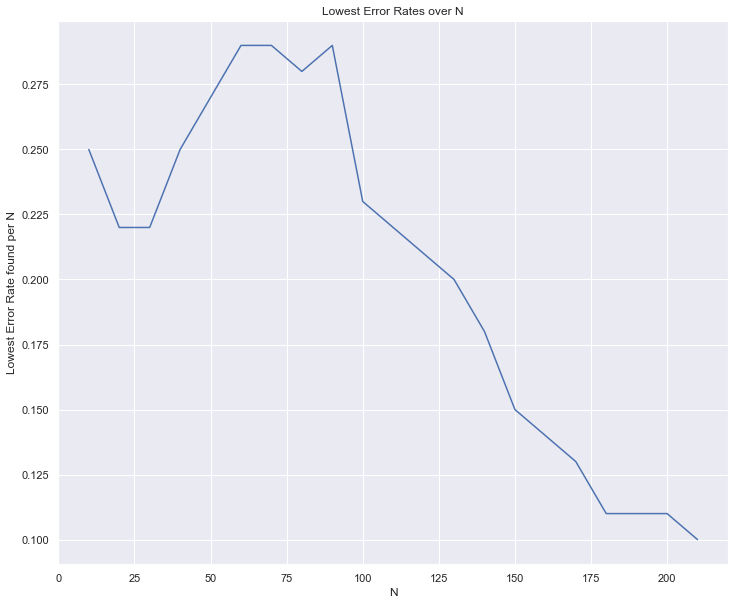

In [60]:
plt.plot(n, mink_list)
plt.xlabel('N')
plt.ylabel('Lowest Error Rate found per N')
plt.title('Lowest Error Rates over N')
plt.show()

***Part D. Extra Credit***

***Minkowski***

In [61]:
x_train = train_2c.iloc[:,0:6]
y_train = train_2c.iloc[:,6]

In [62]:
x_test = test_2c.iloc[:,0:6]
y_test = test_2c.iloc[:,6]

In [63]:
y_train = list(y_train)
y_test = list(y_test)

In [64]:
xrange = list(range(1,197,5))
errorlist = []
errortrain = []
size = len(y_test)
for i in xrange:
    #KNN and errors for test set
    classifier = KNeighborsClassifier(n_neighbors=i, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_predict = classifier.predict(x_test)
    
    error = 0
    for i in range(0,size):
        if y_test[i] != y_predict[i]:
            error = error+1
    errorlist.append(error/70)
    
    #KNN and errors for training set
    classifier.fit(x_train, y_train)
    y_predict2 = classifier.predict(x_train)
    error = 0
    for i in range(0,size):
        if y_train[i] != y_predict2[i]:
            error = error+1
    errortrain.append(error/70)

Error for test set

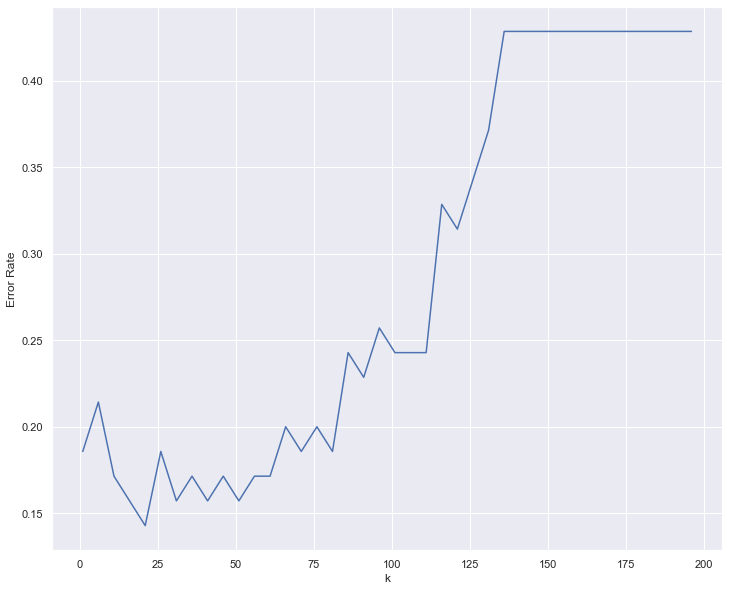

In [65]:
plt.plot(xrange,errorlist)
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.show()

In [66]:
min_index = np.argmin(errorlist)
min_k = 1 + min_index*5
print(min_k)

21


In [67]:
min(errorlist)

0.14285714285714285

Error for training set

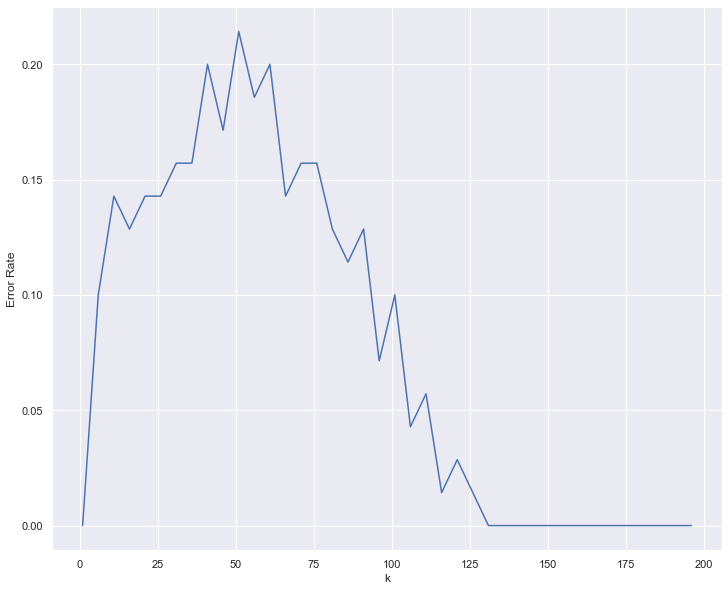

In [68]:
plt.plot(xrange,errortrain)
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.show()

In [69]:
min_index = np.argmin(errortrain)
min_k = 1 + min_index*5
print(min_k)

1


In [70]:
min(errortrain)

0.0

***Minkowski and Manhattan distance***

In [71]:
xrange = list(range(1,197,5))
errorlist = []
errortrain = []
size = len(y_test)
for i in xrange:
    #KNN and errors for test set
    classifier = KNeighborsClassifier(n_neighbors=i, p=1, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_predict = classifier.predict(x_test)
    
    error = 0
    for i in range(0,size):
        if y_test[i] != y_predict[i]:
            error = error+1
    errorlist.append(error/70)
    
    #KNN and errors for training set
    classifier.fit(x_train, y_train)
    y_predict2 = classifier.predict(x_train)
    error = 0
    for i in range(0,size):
        if y_train[i] != y_predict2[i]:
            error = error+1
    errortrain.append(error/70)

Error for Test Set

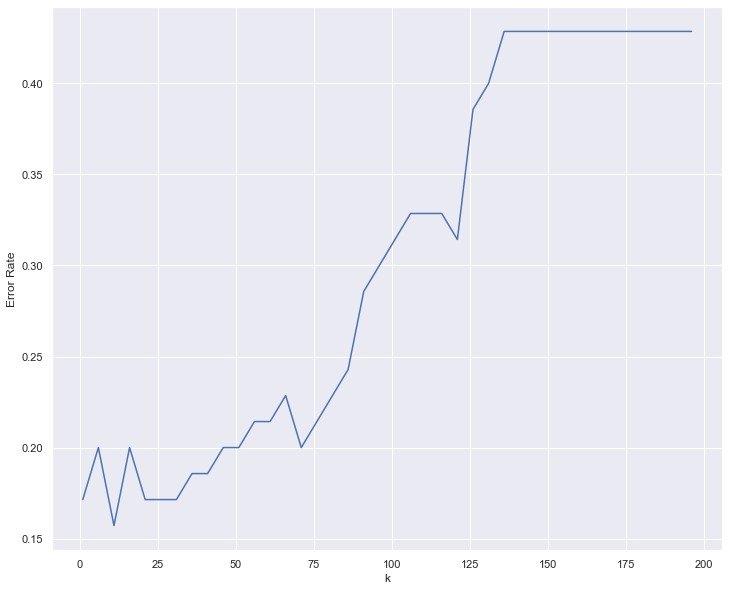

In [72]:
plt.plot(xrange,errorlist)
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.show()

In [73]:
min_k = 1+5*np.argmin(errorlist)
print(min_k)

11


In [74]:
min(errorlist)

0.15714285714285714

Error for Training Set

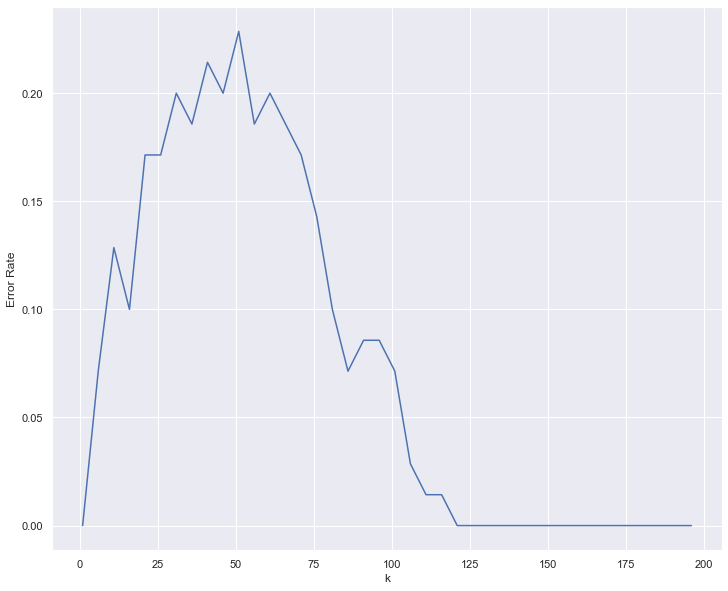

In [75]:
plt.plot(xrange,errortrain)
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.show()

In [76]:
min_k = 1+5*np.argmin(errortrain)
print(min_k)

1


In [77]:
min(errortrain)

0.0

***Part F***

The lowest training error rate achieved was 0%.